# Week 4 exercise

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

## confidence interval calculations

In [2]:
# N = sample size
N = 10
# generate random number
myerr = np.random.random(N)-.5
# add the random number
noiselevel=5.0
x = 10.0 + noiselevel*myerr
print(str(x.round(1)))

[10.7 11.9  8.3 11.1 10.3  8.7 10.9  8.4 12.1 11.9]


In [3]:
# sample mean and std
M = np.mean(x)
s = np.std(x,ddof=1)
print('sample mean is '+str(M.round(1))+' and sample std is '+str(s.round(1)))

sample mean is 10.4 and sample std is 1.5


In [4]:
# calculate standard error
N = np.size(x)
SE = s/np.sqrt(N-1)
print('sample size is '+str(N)+' standard error is '+str(SE.round(1)))

sample size is 10 standard error is 0.5


In [5]:
# calculate the critical t value
CL = 0.95
alpha = 1-CL
df = N-1 # degree of freedom
tcrit = stats.t.ppf(1-alpha/2,df)
dX = tcrit*SE
print('the '+str(CL*100)+' percent confidence interval on the true mean is '+str(M.round(1))+' (+/-) '+str(dX.round(1)))

the 95.0 percent confidence interval on the true mean is 10.4 (+/-) 1.1


In [6]:
## monte carlo test
K=10000
N=10
CL = 0.95
alpha = 1-CL
df = N-1 # degree of freedom
tcrit = stats.t.ppf(1-alpha/2,df)

CI_correct = np.zeros((K,1)) 
for m in np.arange(0,K,1):
    x0 = noiselevel*(np.random.random((N,1))-.5)
    x = 10.0 + x0
    M = np.mean(x)
    s = np.std(x,ddof=1)
    SE= s/np.sqrt(N-1)
    dX = tcrit*SE
    if (M-dX < 10.0) & (10.0 < M+dX):
        CI_correct[m]=1
        

In [7]:
np.sum(CI_correct)/K

0.9566

## Linear regression

In [8]:
df=pd.read_excel('ATL_MonMeanTemp_1879_2020.xls',skiprows=1)
data=df.to_numpy()
x=data[:,0]
y=data[:,9]
y[10:20]=np.nan

In [9]:
ind=(~np.isnan(y)) & (x > 1981) & (x < 2020)
D=[x[ind],y[ind]]
c=np.cov(D)
a=c[0,1]/c[0,0]
b=np.mean(y[ind])-a*np.mean(x[ind])

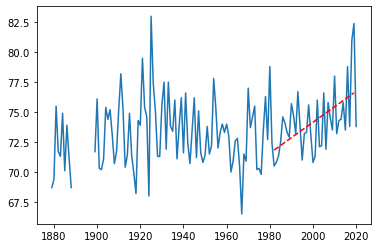

[0.12914979757085024, -184.14574898785435, 0.28934245921613366]


In [10]:
plt.plot(x,y)
plt.plot(x[ind],a*x[ind]+b,'r--')
plt.show()
r2=c[0,1]**2/c[0,0]/c[1,1]
print([a,b,r2])

In [11]:
# Matrix way: pseudo inverse
N=np.size(x[ind])
A=np.ones((N,2))
A[:,0]=x[ind]
xvec=np.linalg.pinv(A)@y[ind]
print(xvec)

[ 1.29149798e-01 -1.84145749e+02]


<function matplotlib.pyplot.show(close=None, block=None)>

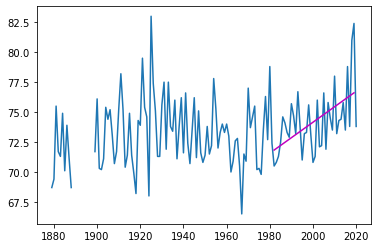

In [12]:
plt.plot(x,y)
plt.plot(x[ind],A@xvec,'m-')
plt.show

In [13]:
R2 = xvec[0]**2 * np.var(x[ind])/np.var(y[ind])
print('R2 value is '+str(R2))

R2 value is 0.2893424592161262
